In [1]:
%matplotlib inline 
from interval import interval
import matplotlib.pyplot as plt
from sympy import(
    init_printing,
    var,
    exp,
    cos,
    sin,
    log,
    expand_log
)
from sympy.utilities.lambdify import lambdify 
from sympy.plotting import plot
init_printing()
import numpy as np

from ivmat import ivmat as ip
from fmat import fmat
from krawczyk import Krawczyk
from symbol_derivative import(
    get_f_df_ddf_from_symbol_representation,
    get_global_minima_from_f_expr,
    calc_f_expr_meshgrid,
    plot3D,
    visualize_optimization_log,
)
from nelder_mead import NelderMead

In [13]:
alpha, beta, k = args = var("alpha, beta, k")
t = var("t")
z = var("z")
y_0 = var("y_0")

curve_expr = alpha * exp(-beta * exp(-k**t))
display(curve_expr)

true_curve_expr = curve_expr.subs([(alpha, 1.0), (beta, 1.25), (k, 1.07)])
display(true_curve_expr)


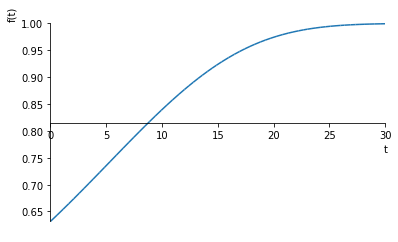

[(0, 0.63137878619651466), (5, 0.73531180420679765), (10, 0.8396095163837477), (15, 0.92386311067211879)]


In [3]:
plot(true_curve_expr, (t, 0, 30))
true_curve = lambdify(t, true_curve_expr)
sample_data = [(time, true_curve(time)) for time in np.arange(0, 20, 5)]
print(sample_data)

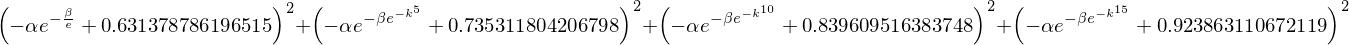

In [4]:
loss_expr = 0
for time, value in sample_data:
    pred_value = curve_expr.subs(t, time)
    loss_expr += (value - pred_value) ** 2
f_expr = loss_expr
display(f_expr)

seed_num = 431
np.random.seed(seed_num)
low = 0.01
high = 2.5
points = np.random.uniform(low=low, high=high, size=(len(args)+1, len(args)))
np_func = lambdify([args], f_expr, modules=np) 

In [5]:
nelder = NelderMead(np_func, points)
for i in range(1, 500+1):
    nelder.update_points()
local_minima = nelder.func(nelder.points[0])
print local_minima

2.46519032882e-32


In [6]:
f, df, ddf = get_f_df_ddf_from_symbol_representation(f_expr, args)

In [7]:
X = ip([
    [interval[0.996, 1.0021]],
    [interval[1.2494, 1.2504]], 
    [interval[1.0691, 1.0703]]
])

X = ip([
    [interval[0.5, 1.6]],
    [interval[0.5, 3.0]], 
    [interval[0.6, 3.33]]
])

f(X)

In [8]:
kra = Krawczyk(df, ddf, X)

In [11]:
import time
st = time.time()
ans_boxes, S_num_list, T_num_list, U_num_list, animation_box = kra.find_global_minimum(
    f, tmp_min_sup=local_minima ,trace=True, cnt_max=10000)
print("{}[sec]".format(time.time() - st))

Loop end. cnt:4318, len(S):0, len(T):2, len(U):0

4318
---------- 最終的なS[:10] -----------
[]
---------- 最終的なU[:10] -----------
[]
---------- 最終的なT -----------
[[[interval([0.9999998355396917, 1.0000001644603072])],
  [interval([1.249999598140527, 1.250000401859467])],
  [interval([1.0699999602787214, 1.0700000397212792])]],
 [[interval([0.9999964834113816, 1.000003517276676])],
  [interval([1.2499914049800331, 1.2500085964886367])],
  [interval([1.0699991546971364, 1.070000845141255])]]]
343.73456502[sec]


In [10]:
if len(args) == 2: 
    visualize_optimization_log(kra, f, animation_box, skip=200)